# clustering fire data

## วิษณุ ค้าเครื่องเรือน 6030822121

In [1]:
import pandas as pd

In [2]:
FIRE_DATA = pd.read_excel('https://github.com/Maplub/fire_msc/blob/master/Fire_Data.xlsx?raw=true')

In [3]:
FIRE_DATA.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME               int64
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
dtype: object

In [4]:
FIRE_DATA

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


In [5]:
import numpy as np

In [6]:
import datetime

In [7]:
FIRE_DATA['ACQ_DATE']

0       2019-12-01
1       2019-12-01
2       2019-12-01
3       2019-12-01
4       2019-12-01
           ...    
79229   2020-04-04
79230   2020-04-04
79231   2020-04-04
79232   2020-04-04
79233   2020-04-04
Name: ACQ_DATE, Length: 79234, dtype: datetime64[ns]

In [8]:
FIRE_DATA['ACQ_DATE_INT'] = pd.to_datetime(FIRE_DATA['ACQ_DATE']).astype(np.int64)
FIRE_DATA['ACQ_DATE_INT']

0        1575158400000000000
1        1575158400000000000
2        1575158400000000000
3        1575158400000000000
4        1575158400000000000
                ...         
79229    1585958400000000000
79230    1585958400000000000
79231    1585958400000000000
79232    1585958400000000000
79233    1585958400000000000
Name: ACQ_DATE_INT, Length: 79234, dtype: int64

In [9]:
FIRE_DATA['ACQ_TIME_HOUR'] = pd.to_datetime(FIRE_DATA['ACQ_TIME']//100).astype(np.int64)

In [10]:
FIRE_DATA['ACQ_TIME_MIN'] = pd.to_datetime(FIRE_DATA['ACQ_TIME']%100).astype(np.int64)

In [11]:
FIRE_DATA['ACQ_DATETIME'] = pd.to_datetime(FIRE_DATA['ACQ_DATE_INT']+(FIRE_DATA['ACQ_TIME_HOUR']*3600e9)+(FIRE_DATA['ACQ_TIME_MIN']*60e9)).astype(np.int64)

In [12]:
FIRE_DATA['ACQ_DATETIME_plot'] = pd.to_datetime(FIRE_DATA.ACQ_DATETIME)
FIRE_DATA

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,ACQ_DATE_INT,ACQ_TIME_HOUR,ACQ_TIME_MIN,ACQ_DATETIME,ACQ_DATETIME_plot
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0,1575158400000000000,6,35,1575182100000000000,2019-12-01 06:35:00
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0,1575158400000000000,6,35,1575182100000000000,2019-12-01 06:35:00
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0,1575158400000000000,6,35,1575182100000000000,2019-12-01 06:35:00
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0,1575158400000000000,6,35,1575182100000000000,2019-12-01 06:35:00
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0,1575158400000000000,6,35,1575182100000000000,2019-12-01 06:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0,1585958400000000000,20,3,1586030580000000000,2020-04-04 20:03:00
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0,1585958400000000000,20,3,1586030580000000000,2020-04-04 20:03:00
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0,1585958400000000000,20,3,1586030580000000000,2020-04-04 20:03:00
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0,1585958400000000000,20,3,1586030580000000000,2020-04-04 20:03:00


In [13]:
FIRE_DATA['Total_MIN'] = pd.to_datetime(((FIRE_DATA['ACQ_DATETIME']-1575158400000000000)/(60e9))).astype(np.int64)
FIRE_DATA['Total_DAY'] = pd.to_datetime(((FIRE_DATA['ACQ_DATETIME']-1575158400000000000)/(60e9))/60/24).astype(np.int64)

In [14]:
pivot = FIRE_DATA.loc[FIRE_DATA['Total_DAY']<=7].copy()
pivot

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,...,BRIGHT_TI5,FRP,TYPE,ACQ_DATE_INT,ACQ_TIME_HOUR,ACQ_TIME_MIN,ACQ_DATETIME,ACQ_DATETIME_plot,Total_MIN,Total_DAY
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,...,303.4,5.8,0,1575158400000000000,6,35,1575182100000000000,2019-12-01 06:35:00,395,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,...,306.3,6.4,0,1575158400000000000,6,35,1575182100000000000,2019-12-01 06:35:00,395,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,...,305.0,3.8,0,1575158400000000000,6,35,1575182100000000000,2019-12-01 06:35:00,395,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,...,306.0,4.6,0,1575158400000000000,6,35,1575182100000000000,2019-12-01 06:35:00,395,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,...,303.9,3.1,0,1575158400000000000,6,35,1575182100000000000,2019-12-01 06:35:00,395,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,812,19.15931,100.04431,341.4,0.49,0.49,2019-12-08,605,N,VIIRS,...,299.0,6.7,0,1575763200000000000,6,5,1575785100000000000,2019-12-08 06:05:00,10445,7
812,813,19.58155,100.05330,335.2,0.48,0.48,2019-12-08,605,N,VIIRS,...,299.3,4.5,0,1575763200000000000,6,5,1575785100000000000,2019-12-08 06:05:00,10445,7
813,814,18.49769,100.70833,295.2,0.54,0.42,2019-12-08,1835,N,VIIRS,...,280.1,0.6,0,1575763200000000000,18,35,1575830100000000000,2019-12-08 18:35:00,11195,7
814,815,15.84901,98.62211,305.7,0.44,0.46,2019-12-08,1836,N,VIIRS,...,284.8,0.7,0,1575763200000000000,18,36,1575830160000000000,2019-12-08 18:36:00,11196,7


In [29]:
data = pivot[["LATITUDE","LONGITUDE","Total_MIN"]]
data

,LATITUDE,LONGITUDE,Total_MIN
0,16.33696,98.70137,395
1,16.48906,98.73961,395
2,16.93571,99.06874,395
3,16.54092,98.59869,395
4,16.87473,98.63222,395
...,...,...,...
811,19.15931,100.04431,10445
812,19.58155,100.05330,10445
813,18.49769,100.70833,11195
814,15.84901,98.62211,11196


In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt

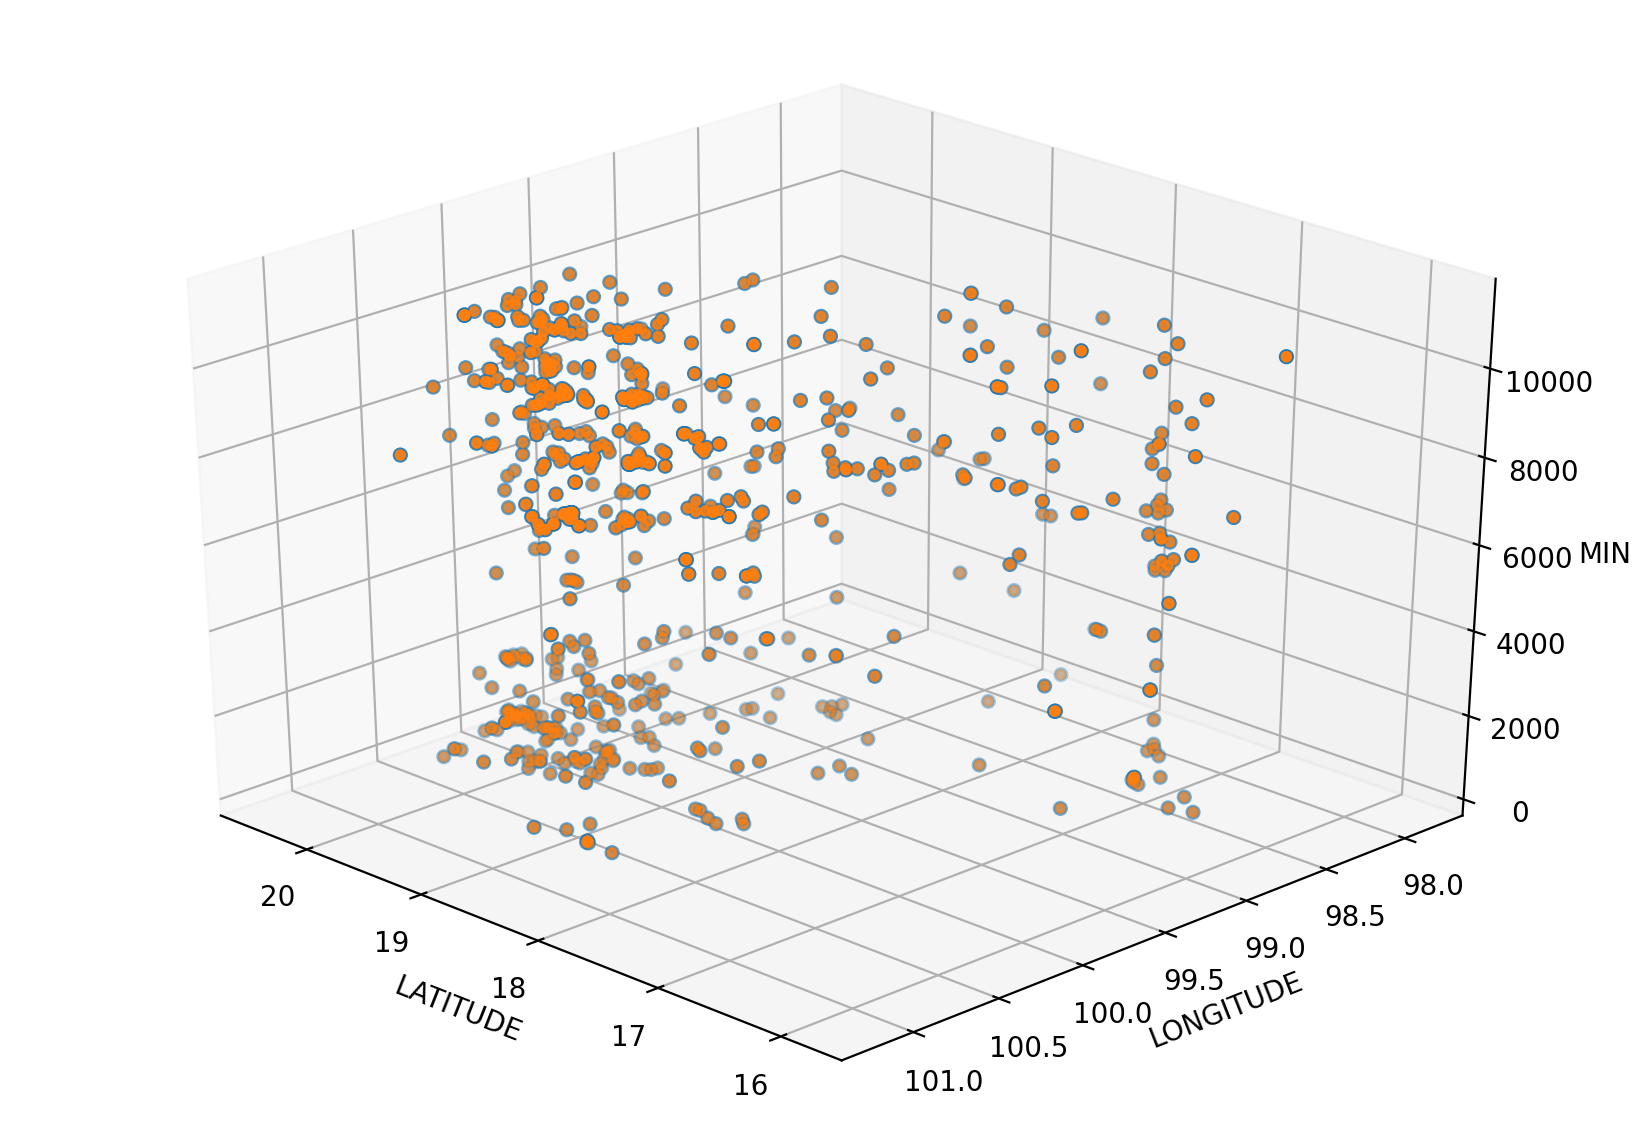

In [31]:
plt.rcParams['figure.figsize']=(8,5.5)
plt.rcParams['figure.dpi']=200
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
x=data['LATITUDE']
y=data['LONGITUDE']
z=data['Total_MIN']
ax.scatter(x,y,z)
ax.view_init(azim=135)
ax.set_xlabel('LATITUDE')
ax.set_ylabel('LONGITUDE')
ax.set_zlabel('MIN')
pnt3d=ax.scatter(x,y,z,s=10)
plt.show()

In [32]:
n = np.array(data.values.tolist())

In [33]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

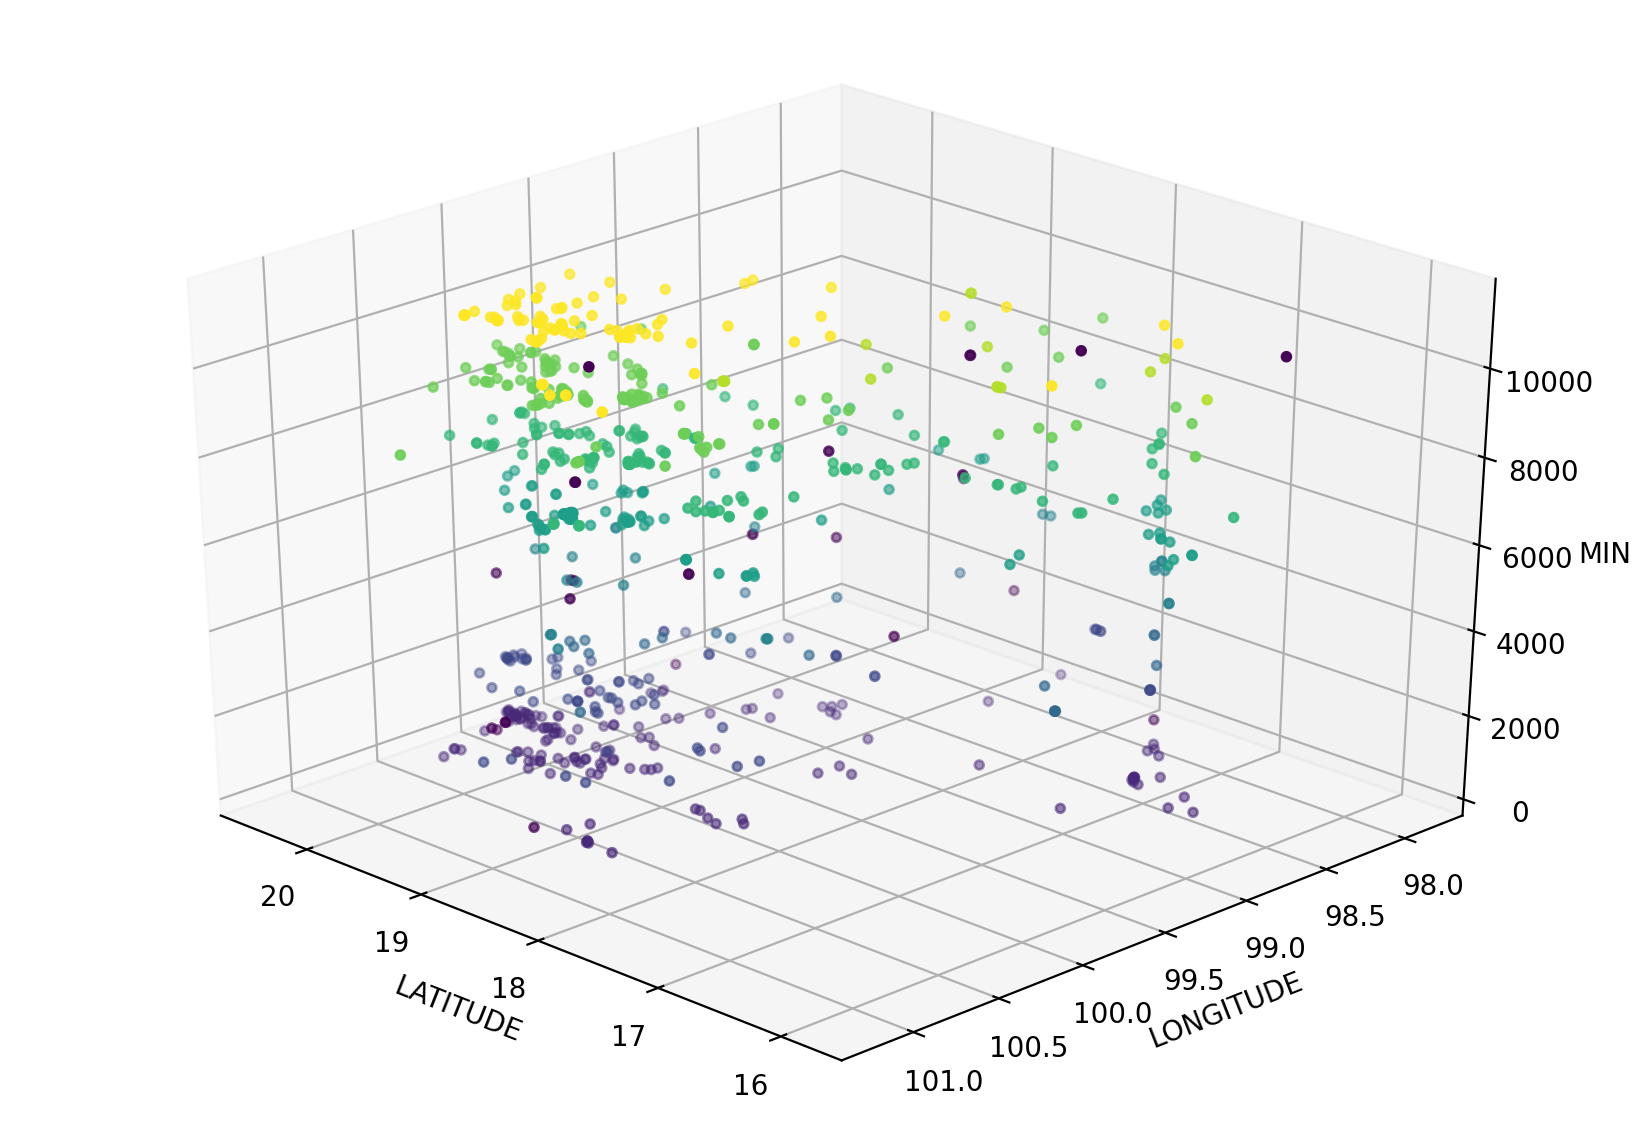

In [36]:
model = DBSCAN(eps=2, min_samples=5).fit(data)
model.fit_predict(data)
pred = model.fit_predict(data)

fig = plt.figure()
axes = Axes3D(fig)
axes.scatter(n[:,0], n[:,1], n[:,2], c=model.labels_, s=10)
axes.view_init(azim=135)
axes.set_xlabel('LATITUDE')
axes.set_ylabel('LONGITUDE')
axes.set_zlabel('MIN')
plt.show()

In [37]:
model_label = model.labels_
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(data,model_label)

0.9302477694666785

ได้ทำการใช้เทคนิค DBSCAN โดยให้จำนวนกลุ่มเท่ากับ 4 (เพราะจากกราฟแรกเมื่อมองด้วยสายตาจะเห็นเป็น 4 กลุ่มย่อย ๆ)และค่า eps = 2 ซึ่งจะได้ค่า silhouette_score = 0.9302477694666785 แสดงว่าการจัดกลุ่มนี้มีความเหมาะสมเพราะมีค่าเข้าใกล้ 1 และมีจุดสีม่วงทีมีการกระจายคือ Outlier